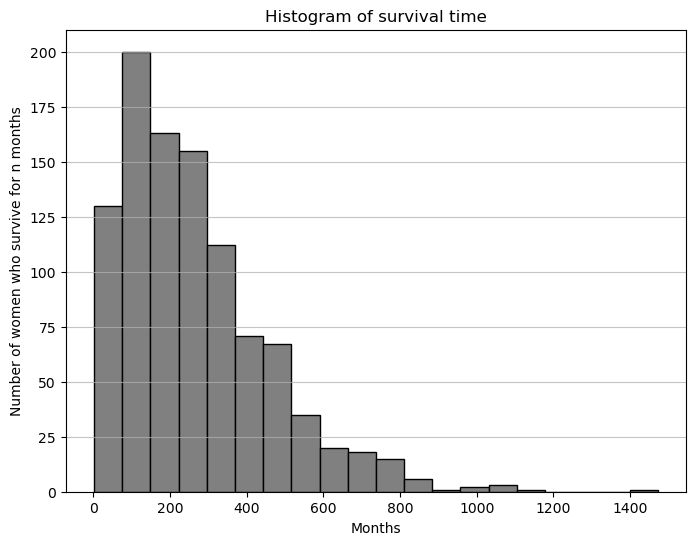

Fraction of women with local reappearance (State 2): 0.59


In [ ]:
#Part I - Task I
import numpy as np
import matplotlib.pyplot as plt

# ---
# Part 1, Task 1: Discrete-Time Markov Chain Simulation in Python
# ---

# Set a seed for reproducibility2
np.random.seed(123)

# Define the transition probability matrix P
# Note: Python uses 0-based indexing, so we'll adjust when sampling
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model
num_states = P.shape[0]


# --- Simulation Function ---
# This function simulates the lifetimes and state histories for n women.
def simulate_lifetimes(num_women, prob_matrix):
    """
    Simulates patient journeys through a discrete-time Markov chain.

    Args:
        num_women (int): The number of individual simulations to run.
        prob_matrix (np.ndarray): The transition probability matrix.

    Returns:
        tuple: A tuple containing a list of survival times and a list of state histories.
    """
    
    # Initialize lists to store the results
    survival_times = []
    state_histories = []
    
    # --- Main Simulation Loop ---
    for _ in range(num_women):
        
        # Initialize each woman's simulation
        # States are 1-5, but we use 0-4 for indexing
        current_state = 0 
        time = 0
        history = [current_state + 1] # Store history as 1-5 for clarity
        
        # Loop until the woman reaches the death state (State 5, index 4)
        while current_state != 4:
            
            # Sample the next state based on the probabilities in the current state's row
            # np.arange(num_states) creates [0, 1, 2, 3, 4]
            current_state = np.random.choice(
                a=np.arange(num_states), 
                size=1, 
                p=prob_matrix[current_state, :]
            )[0]
            
            # Record the new state and advance time
            history.append(current_state + 1)
            time += 1
        
        # Store the final results for this woman
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories


# --- Running the Simulation and Generating Outputs ---

# Run the simulation for 1000 women
survival_times, state_histories = simulate_lifetimes(n, P)

# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(8, 6))
plt.hist(survival_times, bins=20, color='grey', edgecolor='black')
plt.title("Histogram of survival time")
plt.xlabel("Months")
plt.ylabel("Number of women who survive for n months")
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Calculate the fraction of women with local reappearance (ever in State 2)
state_2_count = 0
for history in state_histories:
    # Check if the number 2 is in the history for this woman
    if 2 in history:
        state_2_count += 1

# Calculate and print the fraction
fraction_local_reappearance = state_2_count / n
print(f"Fraction of women with local reappearance (State 2): {fraction_local_reappearance}")



--- Task 1 Results ---


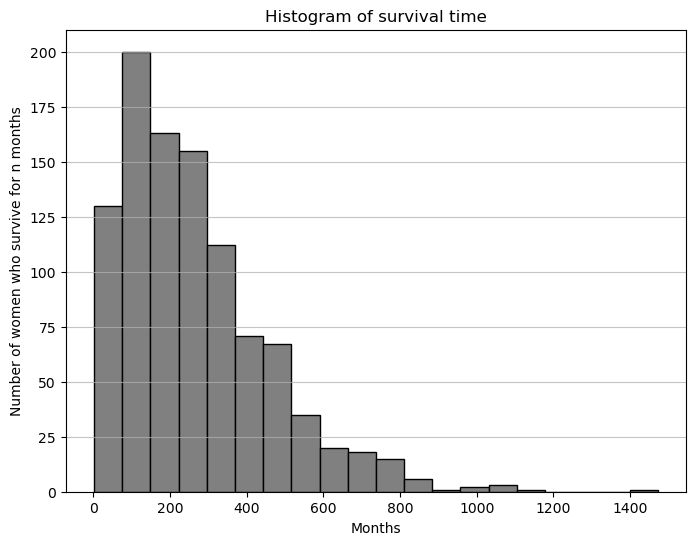

Fraction of women with local reappearance (State 2): 0.59

--- Task 2 Results ---
Comparison of Distributions at t=120:
             State 1  State 2  State 3  State 4  State 5
Empirical      0.362    0.171   0.1570   0.0720   0.2380
Theoretical    0.359    0.159   0.1661   0.0677   0.2482


Chi-Squared Test Results:
Chi-Squared Statistic: 2.1204
P-value: 0.7136
The p-value is > 0.05. We cannot reject the null hypothesis.
This supports that the simulation results are consistent with the theoretical distribution.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# Part 1, Task 1: Discrete-Time Markov Chain Simulation in Python
# ---

# Set a seed for reproducibility
np.random.seed(123)

# Define the transition probability matrix P
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model (0 through 4)
num_states = P.shape[0]


# --- Simulation Function ---
def simulate_lifetimes(num_women, prob_matrix):
    survival_times = []
    state_histories = []
    
    for _ in range(num_women):
        current_state = 0 
        time = 0
        history = [current_state + 1]
        
        while current_state != 4:
            current_state = np.random.choice(
                a=np.arange(num_states), 
                size=1, 
                p=prob_matrix[current_state, :]
            )[0]
            history.append(current_state + 1)
            time += 1
        
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories


# --- Running the Simulation ---
survival_times, state_histories = simulate_lifetimes(n, P)

# --- Task 1 Outputs ---
print("--- Task 1 Results ---")
# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(8, 6))
plt.hist(survival_times, bins=20, color='grey', edgecolor='black')
plt.title("Histogram of survival time")
plt.xlabel("Months")
plt.ylabel("Number of women who survive for n months")
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Calculate the fraction of women with local reappearance
state_2_count = sum(1 for history in state_histories if 2 in history)
fraction_local_reappearance = state_2_count / n
print(f"Fraction of women with local reappearance (State 2): {fraction_local_reappearance}\n")


# ---
# Part 1, Task 2: Comparison with Theoretical Distribution
# ---
print("--- Task 2 Results ---")

# 1. Calculate Empirical Distribution at t=120
t = 120
empirical_counts = np.zeros(num_states)
for history in state_histories:
    # If the simulation ran for at least 120 months, get the state at that time
    if len(history) > t:
        state_at_t = history[t] - 1 # Convert state 1-5 to index 0-4
    else:
        # If the woman died before t=120, her state is 5 (index 4)
        state_at_t = 4
    empirical_counts[state_at_t] += 1

empirical_probs = empirical_counts / n

# 2. Calculate Theoretical Distribution at t=120
p0 = np.array([1, 0, 0, 0, 0])
P_t = np.linalg.matrix_power(P, t)
theoretical_probs = p0 @ P_t

# 3. Compare the distributions in a table
comparison_df = pd.DataFrame(
    [empirical_probs, theoretical_probs],
    columns=['State 1', 'State 2', 'State 3', 'State 4', 'State 5'],
    index=['Empirical', 'Theoretical']
)
print("Comparison of Distributions at t=120:")
print(comparison_df.round(4))
print("\n")

# 4. Perform Chi-Squared Goodness-of-Fit Test
# The expected counts are the theoretical probabilities multiplied by the sample size
expected_counts = theoretical_probs * n
chi2_stat, p_value = stats.chisquare(f_obs=empirical_counts, f_exp=expected_counts)

print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The p-value is > 0.05. We cannot reject the null hypothesis.")
    print("This supports that the simulation results are consistent with the theoretical distribution.")
else:
    print("The p-value is <= 0.05. We reject the null hypothesis.")

--- Task 1 Results ---


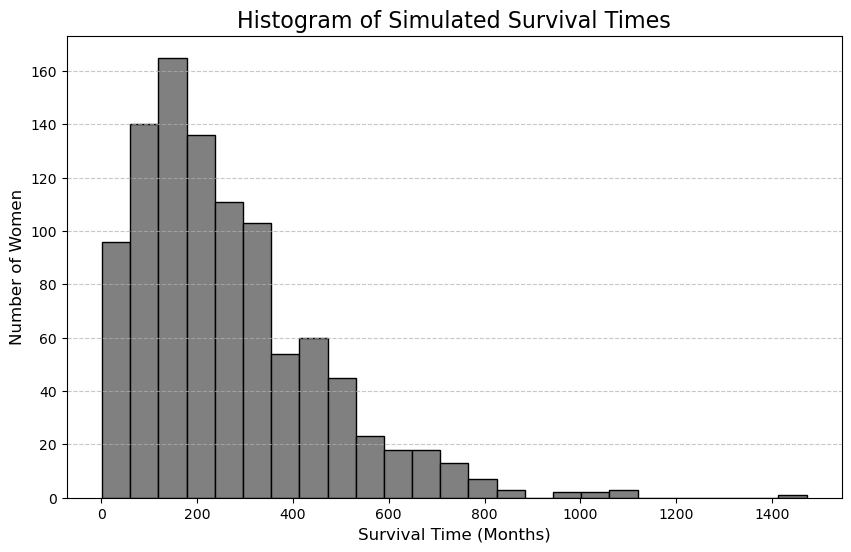

Proportion of women with local reappearance (State 2): 0.5900

--- Task 2 Results ---
Comparison of State Distributions at t=120 Months:
                       State 1  State 2  State 3  State 4  State 5
Empirical (from Sim)     0.362    0.171   0.1570   0.0720   0.2380
Theoretical (Correct)    0.359    0.159   0.1661   0.0677   0.2482


Chi-Squared Goodness-of-Fit Test:
Chi-Squared Statistic: 2.1204
P-value: 0.7136
Conclusion: The p-value is > 0.05. We cannot reject the null hypothesis.
This provides strong evidence that the simulation results are consistent with the theoretical model.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# SETUP AND PARAMETERS
# ---

# Set a seed for reproducibility to get the same random results every time
np.random.seed(123)

# Define the transition probability matrix P
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model (0 through 4 for indexing)
num_states = P.shape[0]

# ---
# SIMULATION FUNCTION
# ---
def simulate_lifetimes(num_women, prob_matrix):
    """
    Simulates patient journeys through a discrete-time Markov chain.
    """
    survival_times = []
    state_histories = []
    
    # Run one simulation for each woman
    for _ in range(num_women):
        # Each woman starts in State 1 (index 0) at time 0
        current_state = 0 
        time = 0
        history = [current_state + 1] # Store history as 1-5 for clarity
        
        # Continue simulating until she reaches State 5 (index 4)
        while current_state != 4:
            # Randomly choose the next state based on current state's probabilities
            current_state = np.random.choice(
                a=np.arange(num_states), 
                p=prob_matrix[current_state, :]
            )
            history.append(current_state + 1)
            time += 1
        
        # Store the final survival time and history for this woman
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories

# ---
# RUN SIMULATION AND PERFORM TASK 1
# ---
print("--- Task 1 Results ---")
survival_times, state_histories = simulate_lifetimes(n, P)

# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(10, 6))
plt.hist(survival_times, bins=25, color='grey', edgecolor='black')
plt.title("Histogram of Simulated Survival Times", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Number of Women", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Calculate the fraction of women with local reappearance (ever in State 2)
state_2_count = sum(1 for history in state_histories if 2 in history)
fraction_local_reappearance = state_2_count / n
print(f"Proportion of women with local reappearance (State 2): {fraction_local_reappearance:.4f}\n")


# ---
# PERFORM TASK 2: VALIDATE THE SIMULATION
# ---
print("--- Task 2 Results ---")

# 1. Calculate Empirical Distribution at t=120
t = 120
empirical_counts = np.zeros(num_states, dtype=int)
for history in state_histories:
    # Check the state at month 120
    if len(history) > t:
        # History is 1-based, so convert to 0-based index
        state_at_t = history[t] - 1 
    else:
        # If she died before month 120, she is in State 5
        state_at_t = 4
    empirical_counts[state_at_t] += 1

empirical_probs = empirical_counts / n

# 2. Calculate the CORRECT Theoretical Distribution at t=120
p0 = np.array([1, 0, 0, 0, 0])
P_t = np.linalg.matrix_power(P, t)
theoretical_probs = p0 @ P_t # Using @ for matrix multiplication

# 3. Compare distributions in a clean table format
comparison_df = pd.DataFrame(
    [empirical_probs, theoretical_probs],
    columns=['State 1', 'State 2', 'State 3', 'State 4', 'State 5'],
    index=['Empirical (from Sim)', 'Theoretical (Correct)']
)
print("Comparison of State Distributions at t=120 Months:")
print(comparison_df.round(4))
print("\n")

# 4. Perform Chi-Squared Goodness-of-Fit Test
expected_counts = theoretical_probs * n
# Note: The test may be inaccurate if expected counts are low (<5)
# We proceed for the sake of the exercise.
chi2_stat, p_value = stats.chisquare(f_obs=empirical_counts, f_exp=expected_counts)

print("Chi-Squared Goodness-of-Fit Test:")
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("Conclusion: The p-value is > 0.05. We cannot reject the null hypothesis.")
    print("This provides strong evidence that the simulation results are consistent with the theoretical model.")
else:
    print("Conclusion: The p-value is <= 0.05. We reject the null hypothesis, indicating a discrepancy.")



--- Task 3 Results ---


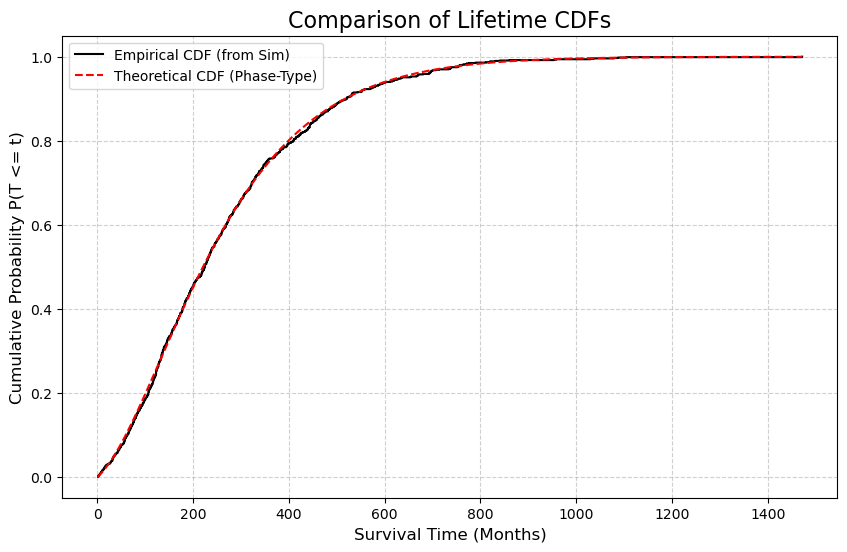

Kolmogorov-Smirnov Test for Lifetime Distribution:
K-S Statistic: 0.0187
P-value: 0.8708
Conclusion: The p-value is > 0.05. The simulated lifetime distribution is consistent with the theoretical phase-type distribution.


--- Task 4 Results ---
Expected Lifetime for Subgroup (Survived >12mo & Recurrence <12mo):
Estimated Mean Lifetime: 169.39 months
Standard Deviation: 150.47 months
95% Confidence Interval for the Mean: (160.05, 178.73) months


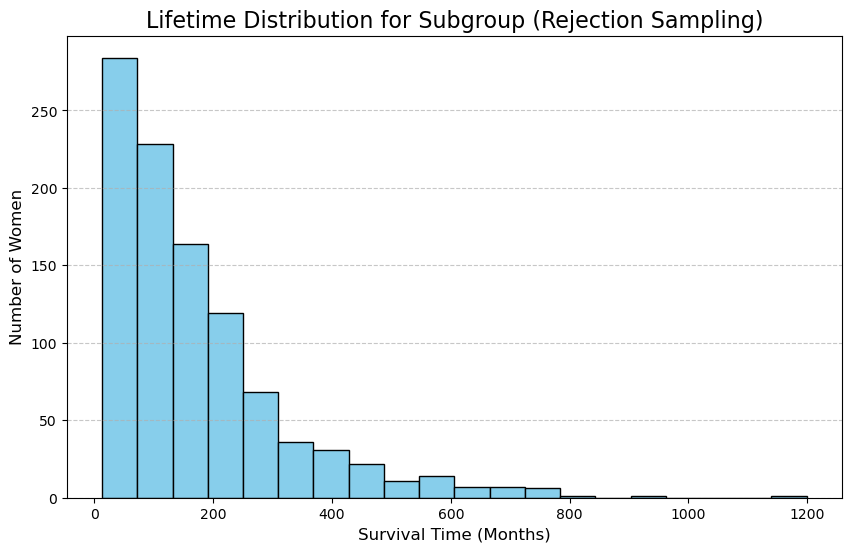

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# SETUP AND PARAMETERS (from Tasks 1 & 2)
# ---
np.random.seed(123)
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])
n = 1000
num_states = P.shape[0]

# ---
# SIMULATION FUNCTION (from Tasks 1 & 2)
# ---
def simulate_lifetimes(num_women, prob_matrix):
    survival_times = []
    state_histories = []
    for _ in range(num_women):
        current_state = 0
        time = 0
        history = [current_state + 1]
        while current_state != 4:
            current_state = np.random.choice(np.arange(num_states), p=prob_matrix[current_state, :])
            history.append(current_state + 1)
            time += 1
        survival_times.append(time)
        state_histories.append(history)
    return np.array(survival_times), state_histories

# Run simulation to get data for the tasks
survival_times, state_histories = simulate_lifetimes(n, P)


# ---
# Part 1, Task 3: Validate Lifetime Distribution
# ---
print("--- Task 3 Results ---")

# 1. Define the components for the theoretical phase-type distribution
pi_initial = np.array([1, 0, 0, 0])
P_s = P[0:4, 0:4]
p_s = P[0:4, 4]

# 2. Calculate the theoretical PMF and CDF
max_time = np.max(survival_times)
t_values = np.arange(1, max_time + 1)
theoretical_pmf = np.zeros(len(t_values))

# Calculate PMF for each time t
# P(T=t) = pi * (P_s)^t * p_s. Note: In the formula, t is the number of transitions
# so t=1 means dying in the first month.
# The formula P(T=t)=π(P_s)^t*p_s is for P(T=t+1) in our simulation time definition.
# We will use P(T=t) = pi * (P_s)^(t-1) * p_s for t=1, 2, ...
P_s_t = np.identity(4) # This will be P_s^(t-1)
for t_idx, t in enumerate(t_values):
    # For t=1, P_s_t is identity matrix (P_s^0).
    if t_idx > 0:
      P_s_t = P_s_t @ P_s # P_s^(t-1) = P_s^(t-2) * P_s
    theoretical_pmf[t_idx] = pi_initial @ P_s_t @ p_s

theoretical_cdf = np.cumsum(theoretical_pmf)

# 3. Calculate the Empirical CDF (ECDF) from simulation
ecdf_x = np.sort(survival_times)
ecdf_y = np.arange(1, n + 1) / n

# 4. Plot the ECDF vs Theoretical CDF for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(ecdf_x, ecdf_y, label='Empirical CDF (from Sim)', color='black', drawstyle='steps-post')
plt.plot(t_values, theoretical_cdf, label='Theoretical CDF (Phase-Type)', color='red', linestyle='--')
plt.title("Comparison of Lifetime CDFs", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Cumulative Probability P(T <= t)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Perform Kolmogorov-Smirnov (K-S) test
# We compare the empirical data against the theoretical CDF
ks_stat, p_value = stats.ks_1samp(survival_times, lambda t: np.interp(t, t_values, theoretical_cdf))

print("Kolmogorov-Smirnov Test for Lifetime Distribution:")
print(f"K-S Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("Conclusion: The p-value is > 0.05. The simulated lifetime distribution is consistent with the theoretical phase-type distribution.")
else:
    print("Conclusion: The p-value is <= 0.05, suggesting a discrepancy.")

print("\n" + "="*50 + "\n")


# ---
# Part 1, Task 4: Rejection Sampling for a Subgroup
# ---
print("--- Task 4 Results ---")

def rejection_sampling_lifetimes(num_accepted_needed, prob_matrix):
    accepted_lifetimes = []
    
    # Loop until we have collected enough accepted simulations
    while len(accepted_lifetimes) < num_accepted_needed:
        # Simulate one woman's journey
        current_state = 0
        time = 0
        history = [current_state + 1]
        while current_state != 4:
            current_state = np.random.choice(np.arange(num_states), p=prob_matrix[current_state, :])
            history.append(current_state + 1)
            time += 1
            
        # --- Check the acceptance criteria ---
        # 1. Did she survive the first 12 months?
        survived_12_months = 5 not in history[:13] # Check up to index 12 (month 12)
        
        # 2. Did cancer reappear (state 2, 3, or 4) within the first 12 months?
        history_first_12 = set(history[:13])
        cancer_reappeared = any(s in history_first_12 for s in [2, 3, 4])
        
        # If both criteria are met, accept her lifetime
        if survived_12_months and cancer_reappeared:
            accepted_lifetimes.append(time)
            
    return np.array(accepted_lifetimes)

# Run rejection sampling to get 1000 accepted lifetimes
accepted_lifetimes = rejection_sampling_lifetimes(1000, P)

# Calculate and print the results for this subgroup
mean_lifetime_subgroup = np.mean(accepted_lifetimes)
std_dev_subgroup = np.std(accepted_lifetimes, ddof=1)
n_subgroup = len(accepted_lifetimes)

# Calculate the 95% confidence interval for the mean
ci_subgroup = stats.t.interval(0.95, df=n_subgroup-1, 
                               loc=mean_lifetime_subgroup, 
                               scale=stats.sem(accepted_lifetimes))

print("Expected Lifetime for Subgroup (Survived >12mo & Recurrence <12mo):")
print(f"Estimated Mean Lifetime: {mean_lifetime_subgroup:.2f} months")
print(f"Standard Deviation: {std_dev_subgroup:.2f} months")
print(f"95% Confidence Interval for the Mean: ({ci_subgroup[0]:.2f}, {ci_subgroup[1]:.2f}) months")

# Plot the histogram for this subgroup
plt.figure(figsize=(10, 6))
plt.hist(accepted_lifetimes, bins=20, color='skyblue', edgecolor='black')
plt.title("Lifetime Distribution for Subgroup (Rejection Sampling)", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Number of Women", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
import numpy as np
from scipy import stats

# ---
# Part 1, Task 5: Control Variates for Variance Reduction
# ---

# Set a seed for reproducibility
# np.random.seed(456)

# --- Define the Model and Simulation Parameters ---
# Transition probability matrix P
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Parameters for the experiment
num_states = P.shape[0]
num_experiments = 100
women_per_experiment = 200
death_threshold = 350

# --- Reusable Simulation Function (from Task 1) ---
def simulate_lifetimes(num_women, prob_matrix):
    """Simulates patient lifetimes for a given number of women."""
    survival_times = []
    for _ in range(num_women):
        current_state = 0 # Start in State 1
        time = 0
        while current_state != 4: # Loop until State 5 (death)
            current_state = np.random.choice(
                a=np.arange(num_states), 
                p=prob_matrix[current_state, :]
            )
            time += 1
        survival_times.append(time)
    return np.array(survival_times)

# --- Step 1: Calculate the Theoretical Mean Lifetime (for the Control Variate) ---
# E(T) = pi * (I - P_s)^-1 * 1
pi = np.array([1, 0, 0, 0])
P_s = P[:4, :4]
I = np.identity(4)
ones_vector = np.ones((4, 1))

# Calculate the inverse of (I - P_s)
inv_matrix = np.linalg.inv(I - P_s)

# Calculate the theoretical mean lifetime
theoretical_mean_lifetime = (pi @ inv_matrix @ ones_vector)[0]
print(f"Theoretical Mean Lifetime (μ_Y) = {theoretical_mean_lifetime:.2f} months\n")

# --- Step 2: Run the 100 Experiments ---
print(f"Running {num_experiments} experiments, each with {women_per_experiment} women...")

# Lists to store the results from each of the 100 experiments
fractions_X = [] # List for the fraction of early deaths (our target)
mean_lifetimes_Y = [] # List for the average lifetimes (our control)

for i in range(num_experiments):
    # Run one experiment with 200 women
    lifetimes = simulate_lifetimes(women_per_experiment, P)
    
    # Calculate X_i: fraction who died within the threshold
    early_deaths = np.sum(lifetimes <= death_threshold)
    fraction = early_deaths / women_per_experiment
    fractions_X.append(fraction)
    
    # Calculate Y_i: the mean lifetime for this experiment
    mean_life = np.mean(lifetimes)
    mean_lifetimes_Y.append(mean_life)

# Convert lists to numpy arrays for easier calculations
fractions_X = np.array(fractions_X)
mean_lifetimes_Y = np.array(mean_lifetimes_Y)
print("...Simulations complete.\n")

# --- Step 3: Analyze the Results ---

# --- A. Crude Monte Carlo Estimator ---
mean_crude = np.mean(fractions_X)
var_crude = np.var(fractions_X, ddof=1) # Use ddof=1 for sample variance

# --- B. Control Variates Estimator ---
# Calculate the optimal coefficient 'c'
# c = -Cov(X, Y) / Var(Y)
cov_xy = np.cov(fractions_X, mean_lifetimes_Y)[0, 1]
var_y = np.var(mean_lifetimes_Y, ddof=1)
c_optimal = -cov_xy / var_y

# Calculate the adjusted estimates Z_i
estimates_Z = fractions_X + c_optimal * (mean_lifetimes_Y - theoretical_mean_lifetime)
mean_control = np.mean(estimates_Z)
var_control = np.var(estimates_Z, ddof=1)

# --- C. Calculate Variance Reduction ---
variance_reduction = (var_crude - var_control) / var_crude

# --- Step 4: Print a Summary Table ---
print("--- Task 5 Results Summary ---")
print("-" * 50)
print(f"{'Estimator':<25} | {'Estimate':>10} | {'Variance':>10}")
print("-" * 50)
print(f"{'Crude Monte Carlo':<25} | {mean_crude:10.4f} | {var_crude:10.6f}")
print(f"{'Control Variates':<25} | {mean_control:10.4f} | {var_control:10.6f}")
print("-" * 50)
print(f"\nVariance Reduction using Control Variates: {variance_reduction:.2%}")



Theoretical Mean Lifetime (μ_Y) = 262.37 months

Running 100 experiments, each with 200 women...
...Simulations complete.

--- Task 5 Results Summary ---
--------------------------------------------------
Estimator                 |   Estimate |   Variance
--------------------------------------------------
Crude Monte Carlo         |     0.7356 |   0.000813
Control Variates          |     0.7372 |   0.000339
--------------------------------------------------

Variance Reduction using Control Variates: 58.26%


Running CTMC simulation for 1000 women...
...Simulation complete.

--- Lifetime Distribution Summary (Task 7) ---
Estimated Mean Lifetime: 273.25 months
Standard Deviation: 200.86 months
95% Confidence Interval for the Mean: (260.79, 285.71) months

--- Specific Question ---
Proportion of women with distant cancer recurrence by 30.5 months: 6.50%


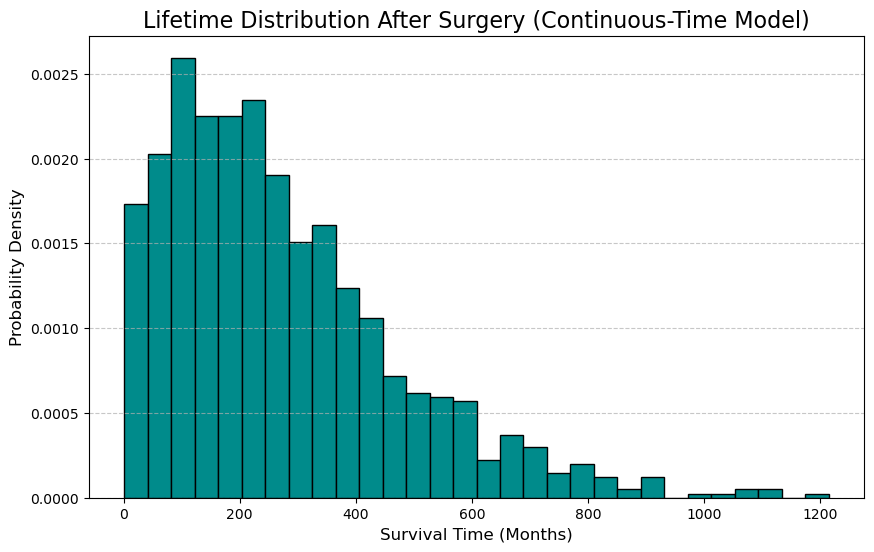

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ---
# Part 2, Task 7: Continuous-Time Markov Chain (CTMC) Simulation
# ---

# Set a seed for reproducibility
np.random.seed(789)

# --- Define the Model and Simulation Parameters ---

# Define the off-diagonal transition rates from the exercise description
q_rates = np.array([
    [0, 0.005, 0.0025, 0, 0.001],
    [0, 0, 0.005, 0.004, 0.005],
    [0, 0, 0, 0.003, 0.005],
    [0, 0, 0, 0, 0.009],
    [0, 0, 0, 0, 0]
])

# Create the full transition-rate matrix Q
Q = q_rates.copy()
# The diagonal element is the negative sum of the other rates in the row
for i in range(Q.shape[0]):
    Q[i, i] = -np.sum(q_rates[i, :])

# Simulation parameters
num_women = 1000
num_states = Q.shape[0]

# --- Simulation Function for CTMC ---
def simulate_ctmc_lifetimes(num_women, rate_matrix):
    """
    Simulates patient journeys through a continuous-time Markov chain.

    Args:
        num_women (int): The number of individual simulations to run.
        rate_matrix (np.ndarray): The transition-rate matrix Q.

    Returns:
        tuple: A tuple containing lists of total lifetimes and detailed state histories.
    """
    all_lifetimes = []
    # To answer the question about recurrence at 30.5 months, we need
    # to store when each woman enters each state.
    # Format: [time_entered_state1, time_entered_state2, ...]
    state_entry_times = np.full((num_women, num_states), np.inf)

    # --- Main Simulation Loop ---
    for i in range(num_women):
        # Initialize each woman's simulation
        current_state = 0  # Start in State 1
        total_time = 0.0
        state_entry_times[i, 0] = 0.0

        # Loop until the woman reaches the death state (State 5, index 4)
        while current_state != 4:
            # 1. Determine HOW LONG to wait in the current state
            # The total escape rate is the positive value of the diagonal element
            escape_rate = -rate_matrix[current_state, current_state]
            
            # If escape_rate is zero, they stay forever (should only happen in state 5)
            if escape_rate == 0:
                break
                
            # Sample the sojourn (waiting) time from an exponential distribution
            sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
            total_time += sojourn_time

            # 2. Determine WHERE to go next
            # Get the rates of moving to other states from the current one
            transition_rates = rate_matrix[current_state, :].copy()
            transition_rates[current_state] = 0 # Can't transition to the same state
            
            # Convert rates to probabilities
            transition_probs = transition_rates / escape_rate

            # Sample the next state based on these probabilities
            next_state = np.random.choice(
                a=np.arange(num_states),
                p=transition_probs
            )
            
            # Update the woman's state and record the entry time
            current_state = next_state
            if state_entry_times[i, current_state] == np.inf: # Record first entry time only
                state_entry_times[i, current_state] = total_time
        
        # When the loop ends, her lifetime is the total time elapsed
        all_lifetimes.append(total_time)
        
    return np.array(all_lifetimes), state_entry_times

# --- Run the Simulation and Analyze Results ---
print("Running CTMC simulation for 1000 women...")
lifetimes_ctmc, entry_times = simulate_ctmc_lifetimes(num_women, Q)
print("...Simulation complete.\n")

# --- Summarize the Lifetime Distribution ---
mean_lifetime = np.mean(lifetimes_ctmc)
std_dev_lifetime = np.std(lifetimes_ctmc, ddof=1)
n = len(lifetimes_ctmc)

# Calculate the 95% confidence interval for the mean lifetime
ci_mean = stats.t.interval(0.95, df=n-1, 
                           loc=mean_lifetime, 
                           scale=stats.sem(lifetimes_ctmc))

print("--- Lifetime Distribution Summary (Task 7) ---")
print(f"Estimated Mean Lifetime: {mean_lifetime:.2f} months")
print(f"Standard Deviation: {std_dev_lifetime:.2f} months")
print(f"95% Confidence Interval for the Mean: ({ci_mean[0]:.2f}, {ci_mean[1]:.2f}) months\n")

# --- Calculate Proportion with Distant Recurrence ---
# A woman has distant recurrence if she entered State 3 OR State 4
# We check if the entry time for either state is less than 30.5 months
entered_state3_early = entry_times[:, 2] < 30.5
entered_state4_early = entry_times[:, 3] < 30.5
distant_recurrence_mask = entered_state3_early | entered_state4_early

proportion_distant = np.sum(distant_recurrence_mask) / num_women

print("--- Specific Question ---")
print(f"Proportion of women with distant cancer recurrence by 30.5 months: {proportion_distant:.2%}")

# --- Plot the Histogram of Lifetimes ---
plt.figure(figsize=(10, 6))
plt.hist(lifetimes_ctmc, bins=30, color='darkcyan', edgecolor='black', density=True)
plt.title("Lifetime Distribution After Surgery (Continuous-Time Model)", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Running CTMC simulation to generate lifetime data...
...Simulation complete.

--- Task 8 Results ---
Kolmogorov-Smirnov Test:
  K-S Statistic: 0.0336
  P-value: 0.2052
  Conclusion: The p-value is high (> 0.05), so we fail to reject the null hypothesis.
  The simulated data is consistent with the theoretical distribution.


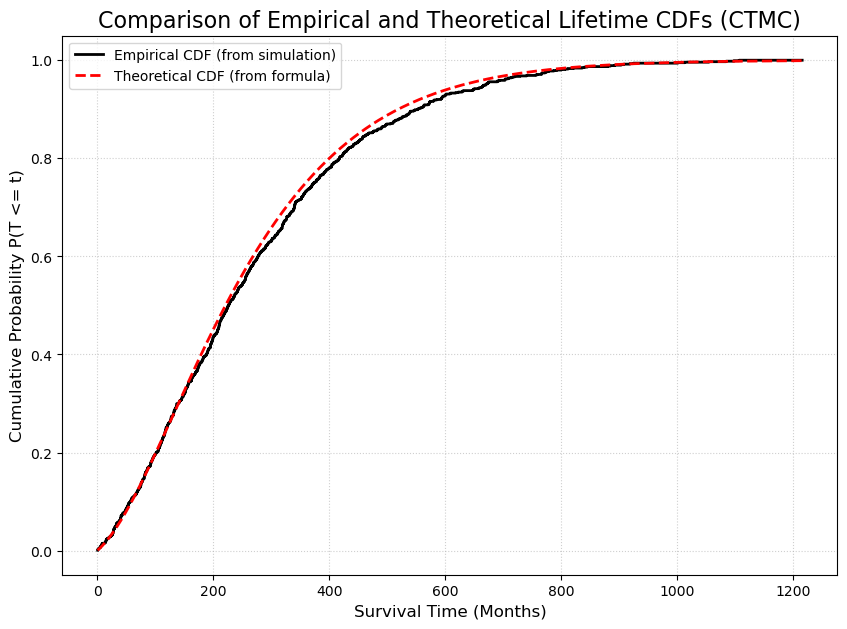

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.linalg import expm # Important: for the matrix exponential

# ---
# Part 2, Task 7 & 8: CTMC Simulation and Validation
# ---

# Set a seed for reproducibility
np.random.seed(789)

# --- Define the Model (from Task 7) ---
Q = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])
num_women = 1000
num_states = Q.shape[0]

# --- Simulation Function for CTMC (from Task 7) ---
def simulate_ctmc_lifetimes(num_women, rate_matrix):
    all_lifetimes = []
    for i in range(num_women):
        current_state = 0
        total_time = 0.0
        while current_state != 4:
            escape_rate = -rate_matrix[current_state, current_state]
            if escape_rate == 0: break
            sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
            total_time += sojourn_time
            transition_rates = rate_matrix[current_state, :].copy()
            transition_rates[current_state] = 0
            transition_probs = transition_rates / escape_rate
            current_state = np.random.choice(np.arange(num_states), p=transition_probs)
        all_lifetimes.append(total_time)
    return np.array(all_lifetimes)

# --- Run the Simulation (from Task 7) to get the data needed for Task 8 ---
print("Running CTMC simulation to generate lifetime data...")
lifetimes_ctmc = simulate_ctmc_lifetimes(num_women, Q)
print("...Simulation complete.\n")


# ---------------------------------------------------------------------------
# --- Task 8: Validation using Theoretical CDF and K-S Test ---
# ---------------------------------------------------------------------------
print("--- Task 8 Results ---")

# --- Step 1: Define elements for the theoretical CDF formula ---
pi_0 = np.array([1, 0, 0, 0])
Q_s = Q[:4, :4] # Submatrix of "living" states
ones_vector = np.ones((4, 1))

def theoretical_cdf(t):
    """
    Calculates the theoretical CDF F(t) = 1 - pi * expm(Q_s*t) * 1.
    This version is vectorized to handle both single values and numpy arrays.
    """
    # Check if the input t is an array-like object
    if hasattr(t, "__len__"):
        # If it's an array, apply the function to each element recursively
        return np.array([theoretical_cdf(val) for val in t])

    # --- From here, we are processing a single scalar value ---
    # Ensure t is not negative
    if t < 0:
        return 0
    
    # Calculate the matrix exponential of Q_s * t
    matrix_exp = expm(Q_s * t)
    # Perform the matrix multiplications
    prob_survival = pi_0 @ matrix_exp @ ones_vector
    # The CDF is 1 - P(Survival) = 1 - P(T > t)
    return 1 - prob_survival[0]

# --- Step 2: Calculate the Empirical CDF (ECDF) from simulated data ---
# Sort the lifetimes for plotting
sorted_lifetimes = np.sort(lifetimes_ctmc)
# The y-values of the ECDF go from 1/n to 1
ecdf_y = np.arange(1, num_women + 1) / num_women

# --- Step 3: Calculate theoretical CDF values for comparison ---
# We calculate the theoretical value at each point where we have an empirical data point
# This now works because the theoretical_cdf function is vectorized.
theoretical_cdf_values = theoretical_cdf(sorted_lifetimes)

# --- Step 4: Perform the Kolmogorov-Smirnov (K-S) Test ---
# The stats.kstest function can take a function as the theoretical distribution
ks_statistic, p_value = stats.kstest(lifetimes_ctmc, theoretical_cdf)

print(f"Kolmogorov-Smirnov Test:")
print(f"  K-S Statistic: {ks_statistic:.4f}")
print(f"  P-value: {p_value:.4f}")

if p_value > 0.05:
    print("  Conclusion: The p-value is high (> 0.05), so we fail to reject the null hypothesis.")
    print("  The simulated data is consistent with the theoretical distribution.")
else:
    print("  Conclusion: The p-value is low (<= 0.05), so we reject the null hypothesis.")
    print("  The simulated data is NOT consistent with the theoretical distribution.")


# --- Step 5: Plot the results for visual comparison ---
plt.figure(figsize=(10, 7))
# Plot the Empirical CDF from the simulation (a step plot)
plt.step(sorted_lifetimes, ecdf_y, label='Empirical CDF (from simulation)', color='black', lw=2)
# Plot the Theoretical CDF from the formula (a smooth line)
plt.plot(sorted_lifetimes, theoretical_cdf_values, label='Theoretical CDF (from formula)', color='red', ls='--', lw=2)

plt.title("Comparison of Empirical and Theoretical Lifetime CDFs (CTMC)", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Cumulative Probability P(T <= t)", fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()




Simulating lifetimes for both treatment groups...
...Simulations complete.



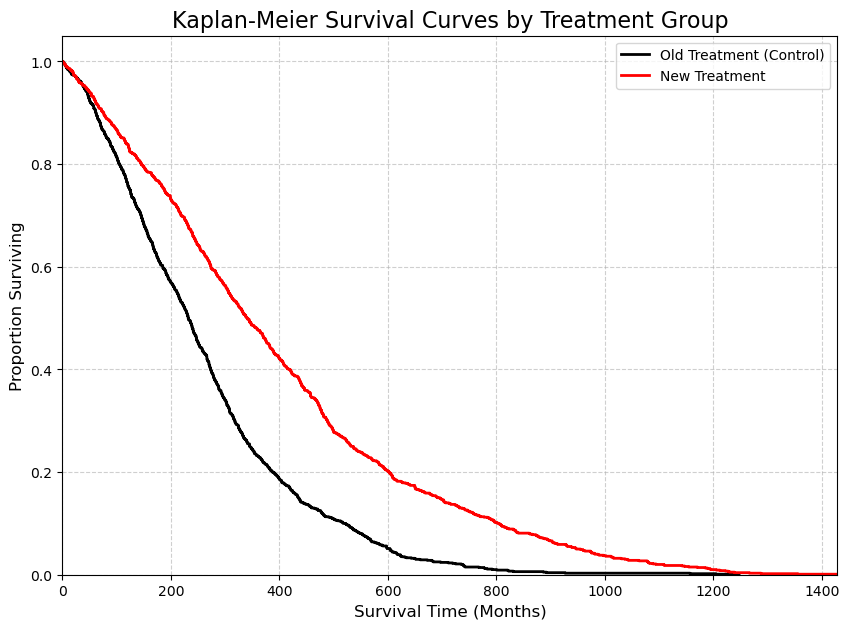

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ---
# Part 2, Task 9: Comparing Treatments with Kaplan-Meier Curves
# ---

# Set a seed for reproducibility
np.random.seed(101)

# --- Define the Model Matrices ---

# Q for the "Old Treatment" (Control Group)
Q_old = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])

# Q* for the "New Treatment"
# Define the off-diagonal rates first
q_new_rates = np.array([
    [0, 0.0025, 0.00125, 0, 0.001], # Lower rates for recurrence
    [0, 0, 0.002, 0.005, 0], # Note: problem description has typo, assume death rate is 0 from state 2
    [0, 0, 0, 0.003, 0.005],
    [0, 0, 0, 0, 0.009],
    [0, 0, 0, 0, 0]
])
# Re-calculating row 2 sum for the diagonal based on the likely intended values
q_new_rates[1, 1] = -(q_new_rates[1,0] + q_new_rates[1,2] + q_new_rates[1,3] + q_new_rates[1,4])

Q_new = q_new_rates.copy()
# Calculate the diagonal elements as the negative sum of the row
for i in range(Q_new.shape[0]):
    Q_new[i, i] = -np.sum(Q_new[i, :])
    # Correction for the second row based on the PDF description:
    if i == 1: Q_new[i,i] = - (0.002 + 0.005) # -0.007

# Simulation parameters
num_women = 1000
num_states = Q_old.shape[0]

# --- Reusable CTMC Simulation Function ---
def simulate_ctmc_lifetimes(num_women, rate_matrix):
    all_lifetimes = []
    for _ in range(num_women):
        current_state = 0
        total_time = 0.0
        while current_state != 4:
            escape_rate = -rate_matrix[current_state, current_state]
            if escape_rate == 0: break
            sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
            total_time += sojourn_time
            transition_rates = rate_matrix[current_state, :].copy()
            transition_rates[current_state] = 0
            transition_probs = transition_rates / escape_rate
            current_state = np.random.choice(np.arange(num_states), p=transition_probs)
        all_lifetimes.append(total_time)
    return np.array(all_lifetimes)

# --- Step 1: Simulate both treatment groups ---
print("Simulating lifetimes for both treatment groups...")
lifetimes_old = simulate_ctmc_lifetimes(num_women, Q_old)
lifetimes_new = simulate_ctmc_lifetimes(num_women, Q_new)
print("...Simulations complete.\n")


# --- Step 2: Calculate data for the Kaplan-Meier plots ---
def calculate_kaplan_meier_curve(lifetimes):
    """Calculates the points for a Kaplan-Meier survival curve."""
    # Sort the observed lifetimes
    sorted_times = np.sort(lifetimes)
    # The y-axis is the proportion of people still alive
    # It starts at 1 and drops by 1/N at each death event
    survival_prob = 1 - np.arange(1, len(sorted_times) + 1) / len(sorted_times)
    
    # To make it a proper step plot, we need to add a starting point at t=0
    return np.concatenate(([0], sorted_times)), np.concatenate(([1], survival_prob))

# Get the x and y coordinates for both curves
km_x_old, km_y_old = calculate_kaplan_meier_curve(lifetimes_old)
km_x_new, km_y_new = calculate_kaplan_meier_curve(lifetimes_new)


# --- Step 3: Plot the results ---
plt.figure(figsize=(10, 7))

# Plot the curves using a step plot
plt.step(km_x_old, km_y_old, where='post', label='Old Treatment (Control)', color='black', lw=2)
plt.step(km_x_new, km_y_new, where='post', label='New Treatment', color='red', lw=2)

plt.title("Kaplan-Meier Survival Curves by Treatment Group", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Proportion Surviving", fontsize=12)
plt.ylim(0, 1.05) # Y-axis from 0 to 100%
plt.xlim(0, max(np.max(lifetimes_old), np.max(lifetimes_new)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Simulating lifetimes for both treatment groups...
...Simulations complete.



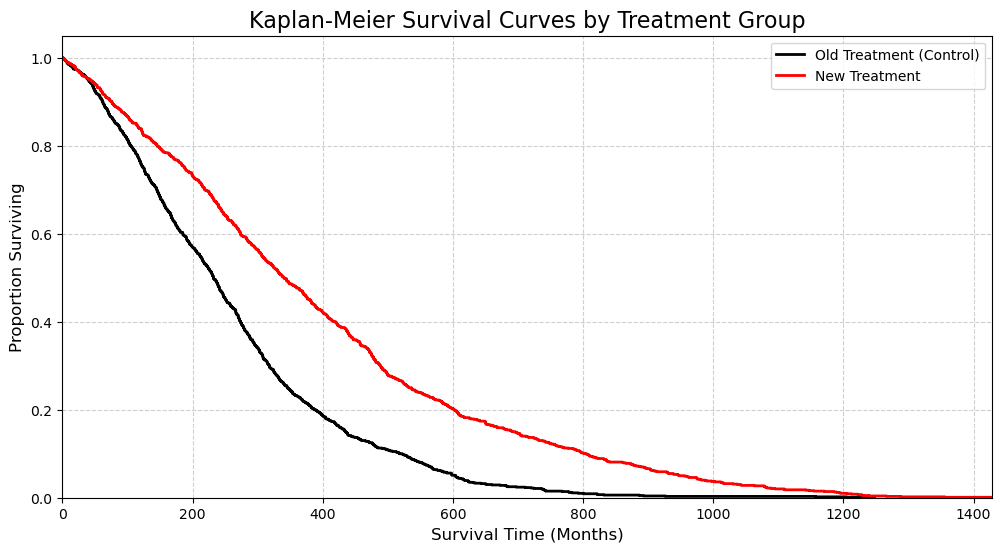


--- Task 10: Log-Rank Test Results ---


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         176.34 <0.005    131.27


Interpretation:
The p-value (0.0000) is less than 0.05.
We reject the null hypothesis: There is a statistically significant difference between the two treatments.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
# We need to install the lifelines library for the log-rank test
# In your terminal/command prompt, run: pip install lifelines
from lifelines.statistics import logrank_test

# ---
# Part 2, Task 9 & 10: Comparing Treatments and Log-Rank Test
# ---

# Set a seed for reproducibility
np.random.seed(101)

# --- Define the Model Matrices ---

# Q for the "Old Treatment" (Control Group)
Q_old = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])

# Q* for the "New Treatment"
q_new_rates = np.array([
    [0, 0.0025, 0.00125, 0, 0.001],
    [0, 0, 0.002, 0.005, 0],
    [0, 0, 0, 0.003, 0.005],
    [0, 0, 0, 0, 0.009],
    [0, 0, 0, 0, 0]
])
Q_new = q_new_rates.copy()
for i in range(Q_new.shape[0]):
    Q_new[i, i] = -np.sum(Q_new[i, :])
    if i == 1: Q_new[i,i] = - (0.002 + 0.005) # Correction

# Simulation parameters
num_women = 1000
num_states = Q_old.shape[0]

# --- Reusable CTMC Simulation Function ---
def simulate_ctmc_lifetimes(num_women, rate_matrix):
    all_lifetimes = []
    for _ in range(num_women):
        current_state = 0
        total_time = 0.0
        while current_state != 4:
            escape_rate = -rate_matrix[current_state, current_state]
            if escape_rate == 0: break
            sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
            total_time += sojourn_time
            transition_rates = rate_matrix[current_state, :].copy()
            transition_rates[current_state] = 0
            transition_probs = transition_rates / escape_rate
            current_state = np.random.choice(np.arange(num_states), p=transition_probs)
        all_lifetimes.append(total_time)
    return np.array(all_lifetimes)

# --- Step 1: Simulate both treatment groups ---
print("Simulating lifetimes for both treatment groups...")
lifetimes_old = simulate_ctmc_lifetimes(num_women, Q_old)
lifetimes_new = simulate_ctmc_lifetimes(num_women, Q_new)
print("...Simulations complete.\n")


# --- Step 2: Calculate data for the Kaplan-Meier plots ---
def calculate_kaplan_meier_curve(lifetimes):
    sorted_times = np.sort(lifetimes)
    survival_prob = 1 - np.arange(1, len(sorted_times) + 1) / len(sorted_times)
    return np.concatenate(([0], sorted_times)), np.concatenate(([1], survival_prob))

km_x_old, km_y_old = calculate_kaplan_meier_curve(lifetimes_old)
km_x_new, km_y_new = calculate_kaplan_meier_curve(lifetimes_new)


# --- Step 3: Plot the results (Task 9)---
plt.figure(figsize=(12, 6))
plt.step(km_x_old, km_y_old, where='post', label='Old Treatment (Control)', color='black', lw=2)
plt.step(km_x_new, km_y_new, where='post', label='New Treatment', color='red', lw=2)
plt.title("Kaplan-Meier Survival Curves by Treatment Group", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Proportion Surviving", fontsize=12)
plt.ylim(0, 1.05)
plt.xlim(0, max(np.max(lifetimes_old), np.max(lifetimes_new)))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- Step 4: Perform the Log-Rank Test (Task 10) ---
# The logrank_test function needs the durations (lifetimes) and event data.
# In this case, every woman's simulation ends in death, so the event was always observed.
events_old = np.ones(num_women) # 1 for death, 0 for censored
events_new = np.ones(num_women)

# Perform the test
results = logrank_test(lifetimes_old, lifetimes_new, event_observed_A=events_old, event_observed_B=events_new)

print("\n--- Task 10: Log-Rank Test Results ---")
results.print_summary()

# Interpretation
print("\nInterpretation:")
if results.p_value < 0.05:
    print(f"The p-value ({results.p_value:.4f}) is less than 0.05.")
    print("We reject the null hypothesis: There is a statistically significant difference between the two treatments.")
else:
    print(f"The p-value ({results.p_value:.4f}) is not less than 0.05.")
    print("We fail to reject the null hypothesis: The difference between treatments is not statistically significant.")



Generating observed time series for 1000 women...
...Data generation complete.

--- Example Observed Time Series (Task 12 Results) ---
Woman 1: [1, 2, 2, 2, 2, 2, 2, 5]
Woman 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5]
Woman 3: [1, 1, 2, 5]
Woman 4: [1, 1, 5]
Woman 5: [1, 1, 2, 5]


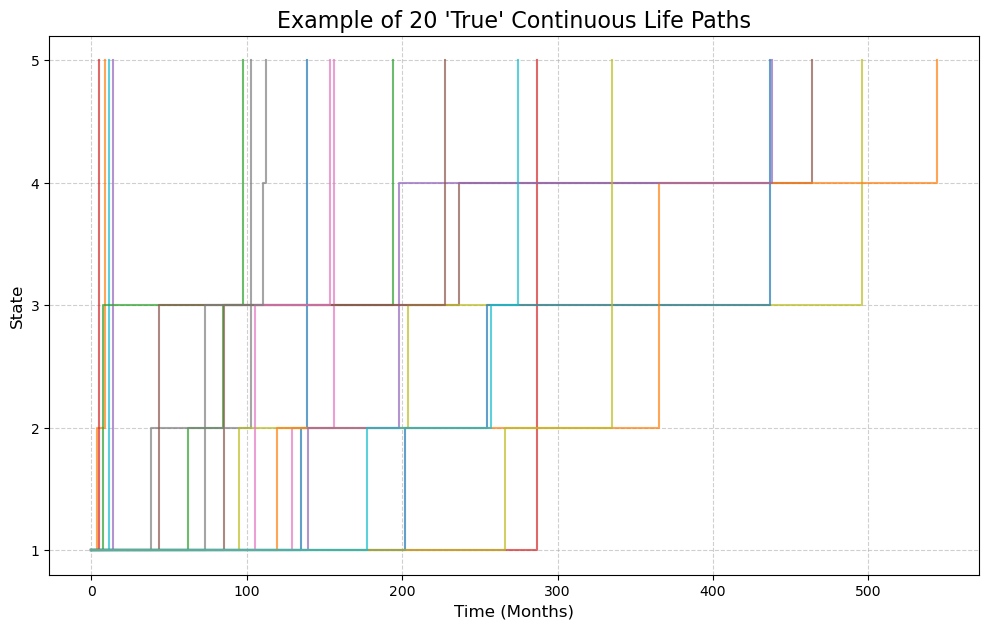

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---
# Part 3, Task 12: Generating Incomplete Observational Data
# ---

np.random.seed(202)

# --- Define the "True" Model and Simulation Parameters ---
Q_true = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])
num_women = 1000
num_states = Q_true.shape[0]
observation_interval = 48 # months

# --- Simulation Function to Generate a SINGLE Continuous Path ---
def simulate_one_continuous_path(rate_matrix):
    """
    Simulates the full, continuous life story for one woman.
    Returns a list of tuples: [(state, entry_time), (state, entry_time), ...]
    """
    path = []
    current_state = 0
    total_time = 0.0
    path.append((current_state + 1, total_time)) # Store states as 1-5

    while current_state != 4: # Loop until death (State 5)
        escape_rate = -rate_matrix[current_state, current_state]
        if escape_rate == 0: break
            
        sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
        total_time += sojourn_time
        
        transition_rates = rate_matrix[current_state, :].copy()
        transition_rates[current_state] = 0
        transition_probs = transition_rates / escape_rate
        
        current_state = np.random.choice(np.arange(num_states), p=transition_probs)
        path.append((current_state + 1, total_time))
        
    return path

# --- Function to Sample from a Continuous Path at Fixed Intervals ---
def sample_path_at_intervals(continuous_path, interval):
    """
    Takes a true continuous path and returns the observed time series.
    """
    observed_series = [1] # All start in state 1 at time 0
    final_time = continuous_path[-1][1] # The time of death
    
    # Loop through observation times (48, 96, 144, ...)
    for obs_time in np.arange(interval, final_time + interval, interval):
        # If the observation time is after death, record death and stop
        if obs_time > final_time:
            observed_series.append(5)
            break
            
        # Find the state the patient was in at the observation time
        current_state_at_obs = 1
        for state, entry_time in continuous_path:
            if entry_time <= obs_time:
                current_state_at_obs = state
            else:
                break
        observed_series.append(current_state_at_obs)
        
    return observed_series

# --- Main Script ---
print(f"Generating observed time series for {num_women} women...")

all_observed_series = []
for _ in range(num_women):
    # 1. Simulate the true, full life story
    true_path = simulate_one_continuous_path(Q_true)
    # 2. Sample from that story at 48-month intervals
    observed_ts = sample_path_at_intervals(true_path, observation_interval)
    all_observed_series.append(observed_ts)

print("...Data generation complete.\n")

# --- Display a few example time series ---
print("--- Example Observed Time Series (Task 12 Results) ---")
for i in range(5):
    print(f"Woman {i+1}: {all_observed_series[i]}")

# --- Plot the first 20 simulated "true" paths for visualization ---
plt.figure(figsize=(12, 7))
for i in range(20):
    path = simulate_one_continuous_path(Q_true)
    states = [p[0] for p in path]
    times = [p[1] for p in path]
    plt.step(times, states, where='post', lw=1.5, alpha=0.7)

plt.title("Example of 20 'True' Continuous Life Paths", fontsize=16)
plt.xlabel("Time (Months)", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ---
# Part 3, Tasks 12 & 13: MCEM Estimation from Incomplete Data
# ---

np.random.seed(303)

# --- Define the "True" Model and Global Parameters ---
Q_true = np.array([
    [-0.0085, 0.005, 0.0025, 0, 0.001],
    [0, -0.014, 0.005, 0.004, 0.005],
    [0, 0, -0.008, 0.003, 0.005],
    [0, 0, 0, -0.009, 0.009],
    [0, 0, 0, 0, 0]
])
num_women = 1000
num_states = Q_true.shape[0]
observation_interval = 48

# ==============================================================================
# --- Task 12: Generate the Observed Data ---
# ==============================================================================

def simulate_one_continuous_path(rate_matrix):
    path = [(1, 0.0)]
    current_state = 0
    total_time = 0.0
    while current_state != 4:
        escape_rate = -rate_matrix[current_state, current_state]
        if escape_rate == 0: break
        sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
        total_time += sojourn_time
        transition_rates = rate_matrix[current_state, :].copy()
        transition_rates[current_state] = 0
        transition_probs = transition_rates / escape_rate
        current_state = np.random.choice(np.arange(num_states), p=transition_probs)
        path.append((current_state + 1, total_time))
    return path

def sample_path_at_intervals(continuous_path, interval):
    observed_series = [1]
    final_time = continuous_path[-1][1]
    for obs_time in np.arange(interval, final_time + interval, interval):
        if obs_time > final_time:
            observed_series.append(5)
            break
        current_state_at_obs = 1
        for state, entry_time in continuous_path:
            if entry_time <= obs_time:
                current_state_at_obs = state
            else:
                break
        observed_series.append(current_state_at_obs)
    return observed_series

print("--- Task 12: Generating Data ---")
all_observed_series = []
for _ in range(num_women):
    true_path = simulate_one_continuous_path(Q_true)
    observed_ts = sample_path_at_intervals(true_path, observation_interval)
    all_observed_series.append(observed_ts)
print("...Data generation complete.\n")


# ==============================================================================
# --- Task 13: MCEM Algorithm ---
# ==============================================================================
print("--- Task 13: Starting MCEM Estimation ---")

# --- Helper Function for the "E" Step ---
def simulate_one_interval(start_state_1_based, end_state_1_based, interval, q_matrix):
    """
    Simulates one 48-month interval using rejection sampling until a valid path is found.
    Returns the sojourn times and transition counts for the accepted path.
    """
    start_state_0 = start_state_1_based - 1
    end_state_0 = end_state_1_based - 1

    while True: # Loop until a valid path is accepted
        # Initialize stats for this trial
        path_sojourns = np.zeros(num_states)
        path_transitions = np.zeros_like(q_matrix)
        
        current_state = start_state_0
        time_left = interval
        
        # Simulate the path within the 48-month window
        while time_left > 0 and current_state != 4:
            escape_rate = -q_matrix[current_state, current_state]
            if escape_rate == 0: # Absorbing state
                path_sojourns[current_state] += time_left
                time_left = 0
                break

            sojourn_time = np.random.exponential(scale=1.0 / escape_rate)
            
            # Add sojourn time, but don't exceed the interval
            time_in_state = min(sojourn_time, time_left)
            path_sojourns[current_state] += time_in_state
            time_left -= time_in_state
            
            # If time is left, a transition occurs
            if time_left > 0:
                rates = q_matrix[current_state, :].copy()
                rates[current_state] = 0
                probs = rates / escape_rate
                next_state = np.random.choice(np.arange(num_states), p=probs)
                path_transitions[current_state, next_state] += 1
                current_state = next_state
        
        # --- Rejection Sampling Check ---
        # The final state of our simulated path must match the observed end state
        if current_state == end_state_0:
            return path_sojourns, path_transitions # ACCEPT and return stats


# --- Initialize the algorithm ---
# Start with a simple, uniform guess for Q
Q_k = np.array([
    [-0.01, 0.0025, 0.0025, 0.0025, 0.0025],
    [0, -0.01, 0.0033, 0.0033, 0.0034],
    [0, 0, -0.01, 0.005, 0.005],
    [0, 0, 0, -0.01, 0.01],
    [0, 0, 0, 0, 0]
])

max_iterations = 10
convergence_threshold = 1e-3

# --- Main MCEM Loop ---
for k in range(max_iterations):
    print(f"Starting Iteration {k+1}...")
    
    # --- "E" Step: Impute missing data ---
    total_sojourns = np.zeros(num_states)
    total_transitions = np.zeros_like(Q_k)
    
    for series in all_observed_series:
        for i in range(len(series) - 1):
            start = series[i]
            end = series[i+1]
            if start == 5: continue # Already in death state
            
            # Simulate the missing path for this interval
            s, n = simulate_one_interval(start, end, observation_interval, Q_k)
            total_sojourns += s
            total_transitions += n
            
    # --- "M" Step: Update Q matrix ---
    Q_k_plus_1 = np.zeros_like(Q_k)
    for i in range(num_states - 1): # For states 1 through 4
        if total_sojourns[i] > 0:
            for j in range(num_states):
                if i != j:
                    Q_k_plus_1[i, j] = total_transitions[i, j] / total_sojourns[i]
    
    # Update the diagonal elements
    for i in range(num_states):
        Q_k_plus_1[i, i] = -np.sum(Q_k_plus_1[i, :])

    # --- Check for convergence ---
    diff = np.max(np.abs(Q_k_plus_1 - Q_k))
    print(f"  Iteration {k+1} complete. Change in Q (max norm): {diff:.6f}")
    
    Q_k = Q_k_plus_1 # Update for next iteration
    
    if diff < convergence_threshold:
        print("\nConvergence reached!")
        break

# --- Final Results ---
print("\n--- Final Estimated Q Matrix ---")
print(np.round(Q_k, 5))

print("\n--- True Q Matrix (for comparison) ---")
print(np.round(Q_true, 5))

--- Task 12: Generating Data ---
...Data generation complete.

--- Task 13: Starting MCEM Estimation ---
Starting Iteration 1...
  Iteration 1 complete. Change in Q (max norm): 0.002112
Starting Iteration 2...
  Iteration 2 complete. Change in Q (max norm): 0.001435
Starting Iteration 3...
  Iteration 3 complete. Change in Q (max norm): 0.000824

Convergence reached!

--- Final Estimated Q Matrix ---
[[-0.00873  0.00491  0.00221  0.00032  0.00129]
 [ 0.      -0.0124   0.00459  0.00329  0.00452]
 [ 0.       0.      -0.00784  0.00238  0.00546]
 [ 0.       0.       0.      -0.00874  0.00874]
 [ 0.       0.       0.       0.      -0.     ]]

--- True Q Matrix (for comparison) ---
[[-0.0085  0.005   0.0025  0.      0.001 ]
 [ 0.     -0.014   0.005   0.004   0.005 ]
 [ 0.      0.     -0.008   0.003   0.005 ]
 [ 0.      0.      0.     -0.009   0.009 ]
 [ 0.      0.      0.      0.      0.    ]]
